In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../data/hearing_test.csv')

In [3]:
df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


In [4]:
from mpl_toolkits.mplot3d import Axes3D

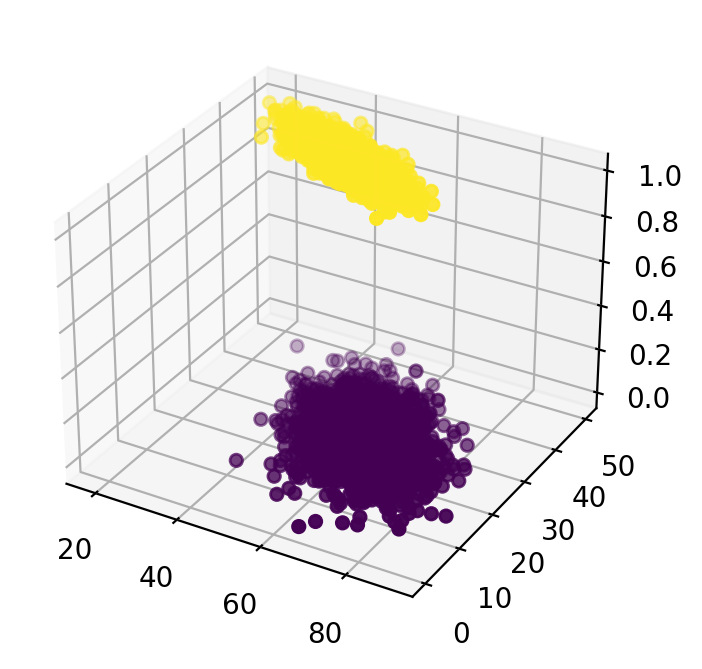

In [5]:

fig=plt.figure(figsize=(4,4),dpi=200)
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])



In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x=df.drop('test_result',axis=1)
y=df['test_result']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler=StandardScaler()

In [11]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

### Coefficient Interpretation

Things to remember:

* These coeffecients relate to the *odds* and can not be directly interpreted as in linear regression.
* We trained on a *scaled* version of the data 
* It is much easier to understand and interpret the relationship between the coefficients than it is to interpret the coefficients relationship with the probability of the target/label class.

Make sure to watch the video explanation, also check out the links below:

* https://stats.idre.ucla.edu/stata/faq/how-do-i-interpret-odds-ratios-in-logistic-regression/
* https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/



In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
model=LogisticRegression()

In [14]:
model.fit(x_train,y_train)

LogisticRegression()

In [15]:
predict=model.predict(x_test)

In [16]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [17]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       498
           1       0.91      0.96      0.93       752

    accuracy                           0.92      1250
   macro avg       0.92      0.91      0.91      1250
weighted avg       0.92      0.92      0.92      1250



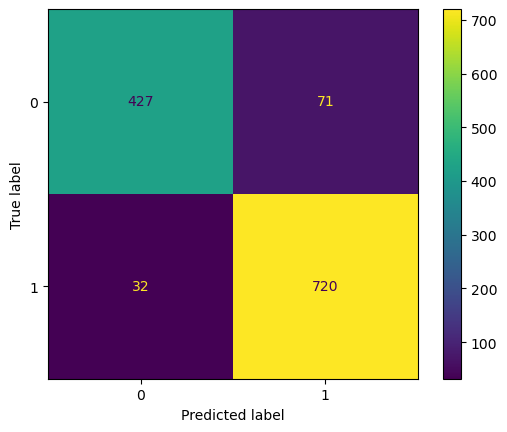

In [18]:

ConfusionMatrixDisplay.from_predictions(y_test,predict)

# Multi-Logistic Regression

In [19]:
df=pd.read_csv('../data/iris.csv')

In [20]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [21]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [22]:
x=df.drop('species',axis=1)
y=df['species']

In [23]:
scaler=StandardScaler()

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [25]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [26]:
logis=LogisticRegression(multi_class='ovr',solver='saga')

In [27]:
logis.fit(x_train,y_train)

LogisticRegression(multi_class='ovr', solver='saga')

In [28]:
pred=logis.predict(x_test)

In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.95      0.90      0.92        20
   virginica       0.85      0.92      0.88        12

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



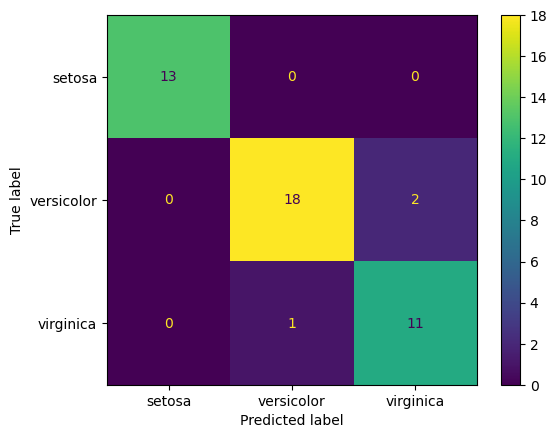

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test,pred)
